In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



## a) Load the "co2_emissions_data.csv" dataset.

In [3]:
df = pd.read_csv('co2_emissions_data.csv')



## b) Perform analysis on the dataset to


>#### i) check whether there are missing values

In [4]:

# to know the number of the rows
print(len(df))

# to get the number of non-null in each column
df.info()

# according to the output there aren't any missing values


7385
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  E

>#### ii) check whether numeric features have the same scale

In [5]:
# To get min and max values for each column

df.describe().T

# according to the output the numeric features dosn't have the same scale


,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


>#### iii) visualize a pairplot in which diagonal subplots are histograms

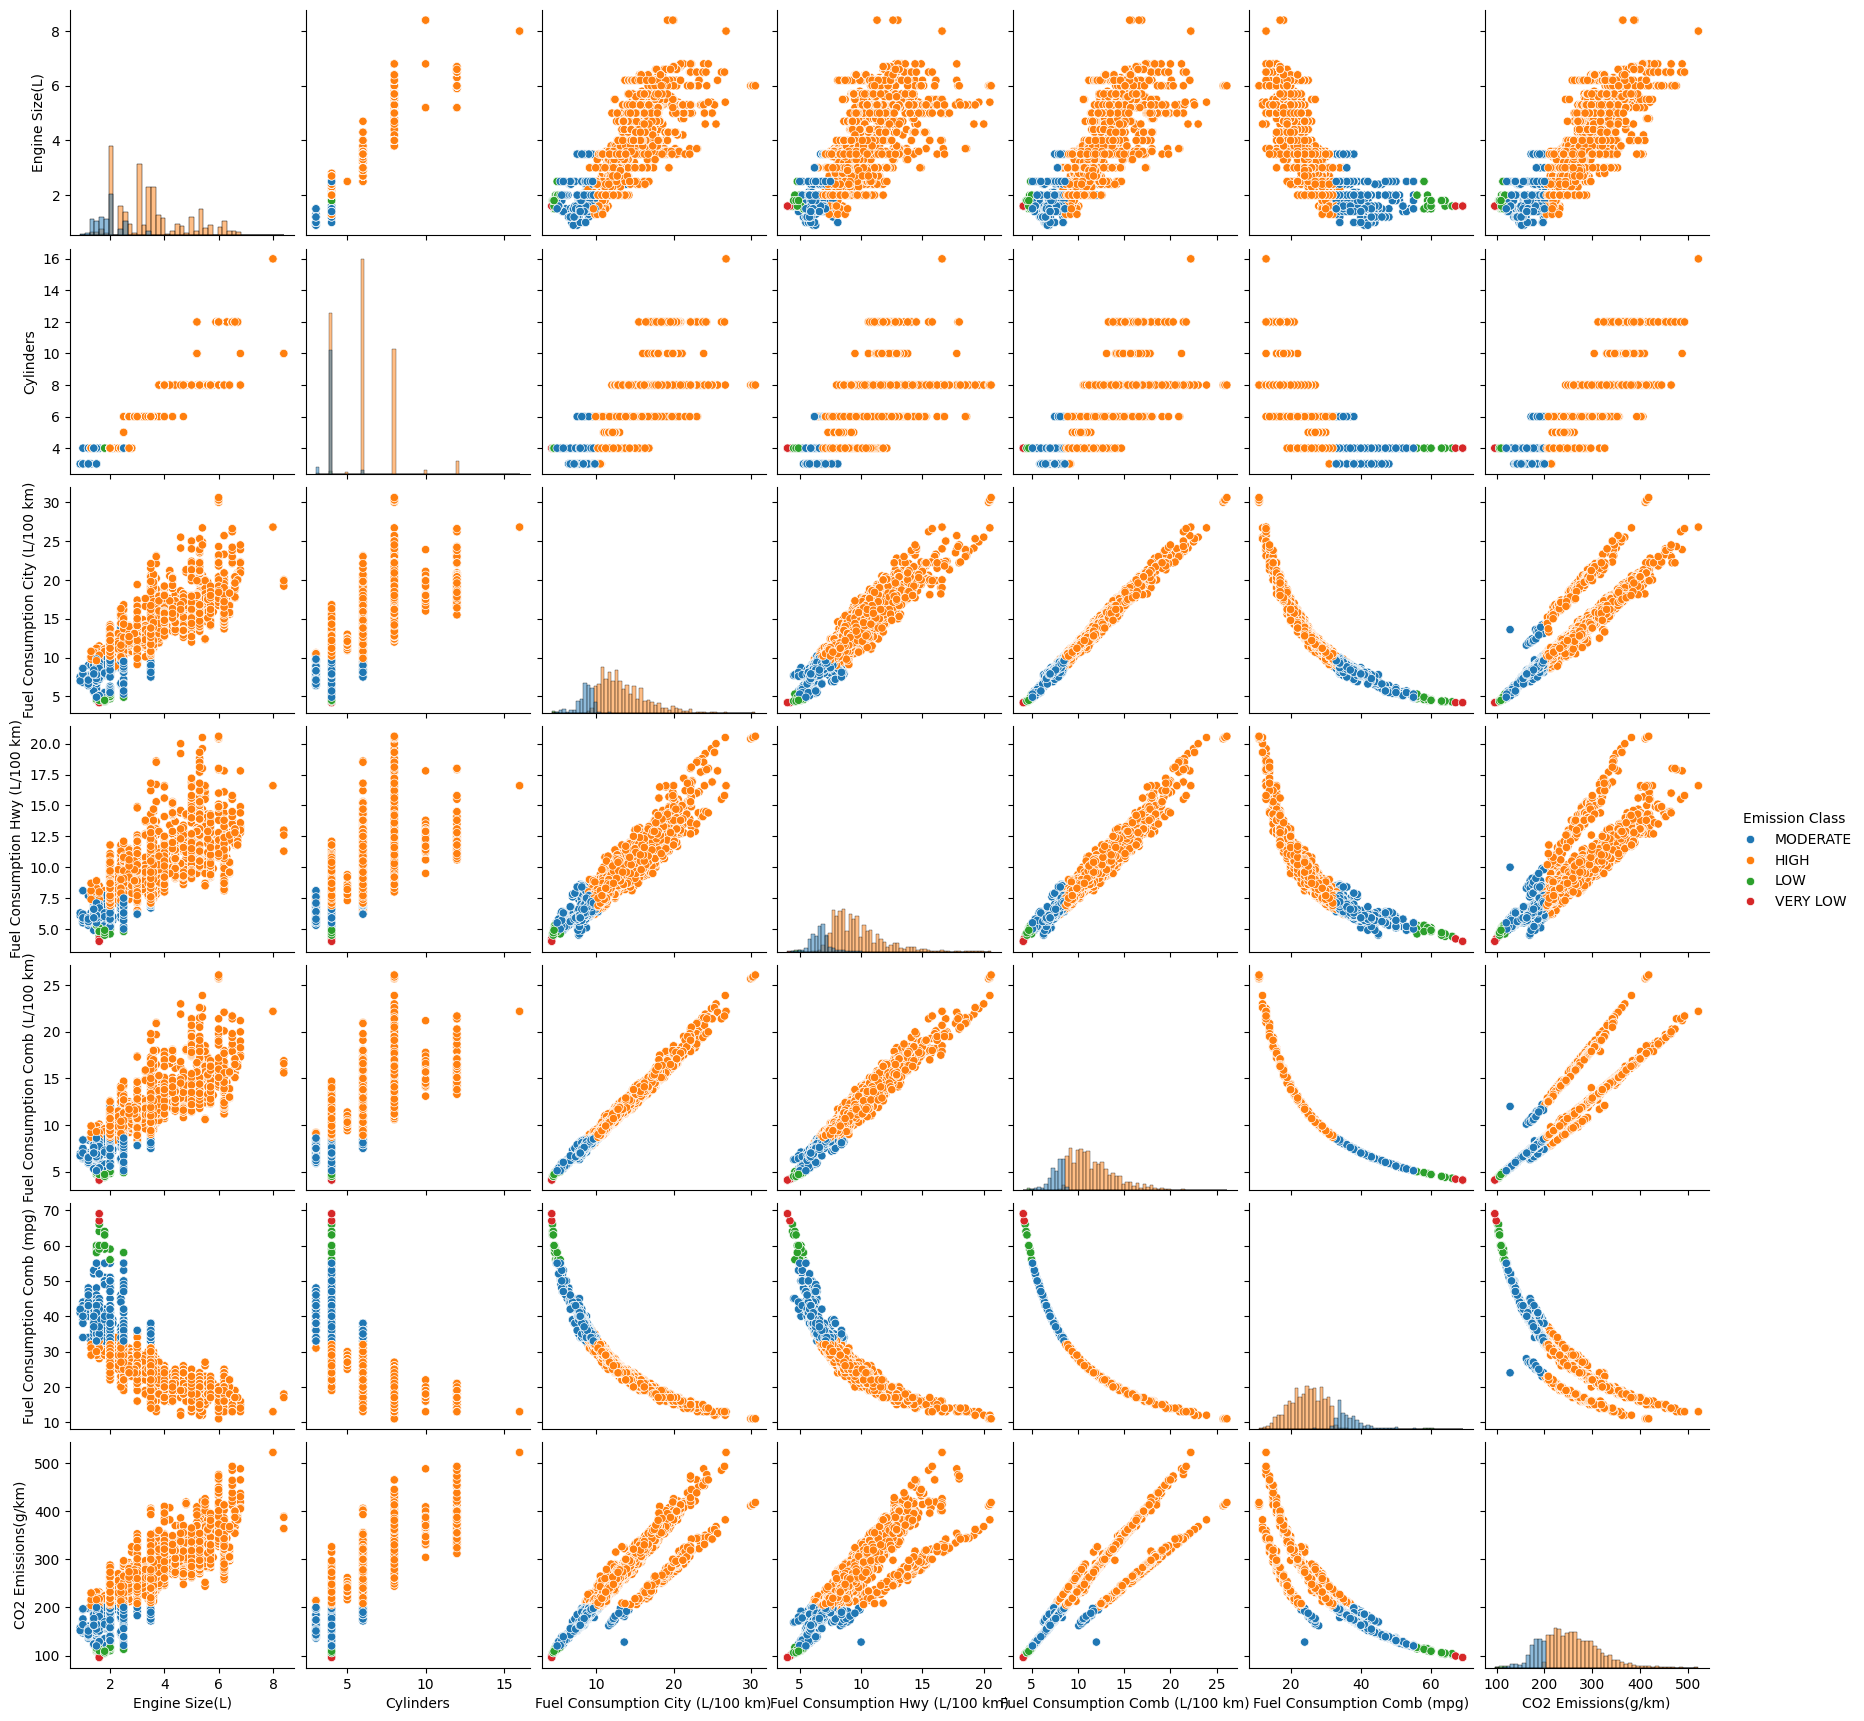

In [6]:
sns.pairplot(df, hue='Emission Class' , diag_kind='hist')


>#### iv) visualize a correlation heatmap between numeric columns


<Axes: >

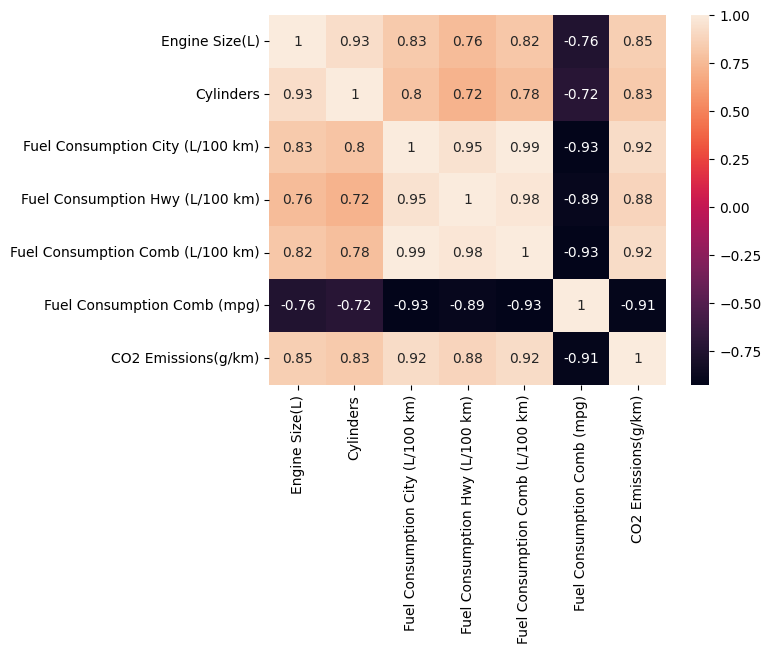

In [7]:

# select only the numeric columns

df_num = df.select_dtypes(exclude="object")
corr = df_num.corr()

# annot to show the numbers in the cells

sns.heatmap(corr, annot=True)



## c) Preprocess the data such that:

In [8]:
# get copy from the original to preprocess

df_pre = df.copy()

>#### i) the features and targets are separated

In [ ]:
targets_columns = ['CO2 Emissions(g/km)' , 'Emission Class']

df_targets = df_pre[targets_columns]
df_features = df_pre.drop(columns=targets_columns)

display(df_features.head())
display(df_targets.head())

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27


,CO2 Emissions(g/km),Emission Class
0,196,MODERATE
1,221,HIGH
2,136,MODERATE
3,255,HIGH
4,244,HIGH


>#### ii) categorical features and targets are encoded

In [11]:

# set the categorical features

label_col_encoded_features = ['Make', 'Model', 'Vehicle Class', 'Transmission' ,'Fuel Type' ]



le = LabelEncoder()
df_features[label_col_encoded_features] = df_features[label_col_encoded_features].apply(le.fit_transform)

df_features.head()




,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27


In [12]:

# get the unique values for targets to show the order of the values
df_targets['Emission Class'].unique()


# scale with ordinal values
ordinal_col_encoded_targets = ['Emission Class']
categories = [
    ['VERY LOW','LOW','MODERATE', 'HIGH' ]
]

oe = OrdinalEncoder(categories=categories)

# get warning here as the slice by this way can cause problems
# df_targets[ordinal_col_encoded_targets] = oe.fit_transform(df_targets[ordinal_col_encoded_targets])

# here the correct way to set the ":" all the rows and the columns that will be transformed
# to slice correctly to Avoid Ambiguity
df_targets.loc[:, ordinal_col_encoded_targets] = oe.fit_transform(df_targets[ordinal_col_encoded_targets])


df_targets.head()

,CO2 Emissions(g/km),Emission Class
0,196,2.0
1,221,3.0
2,136,2.0
3,255,3.0
4,244,3.0



>>##### Based on the correlation heatmap, select two features to be the independent variables of your model.


<Axes: >

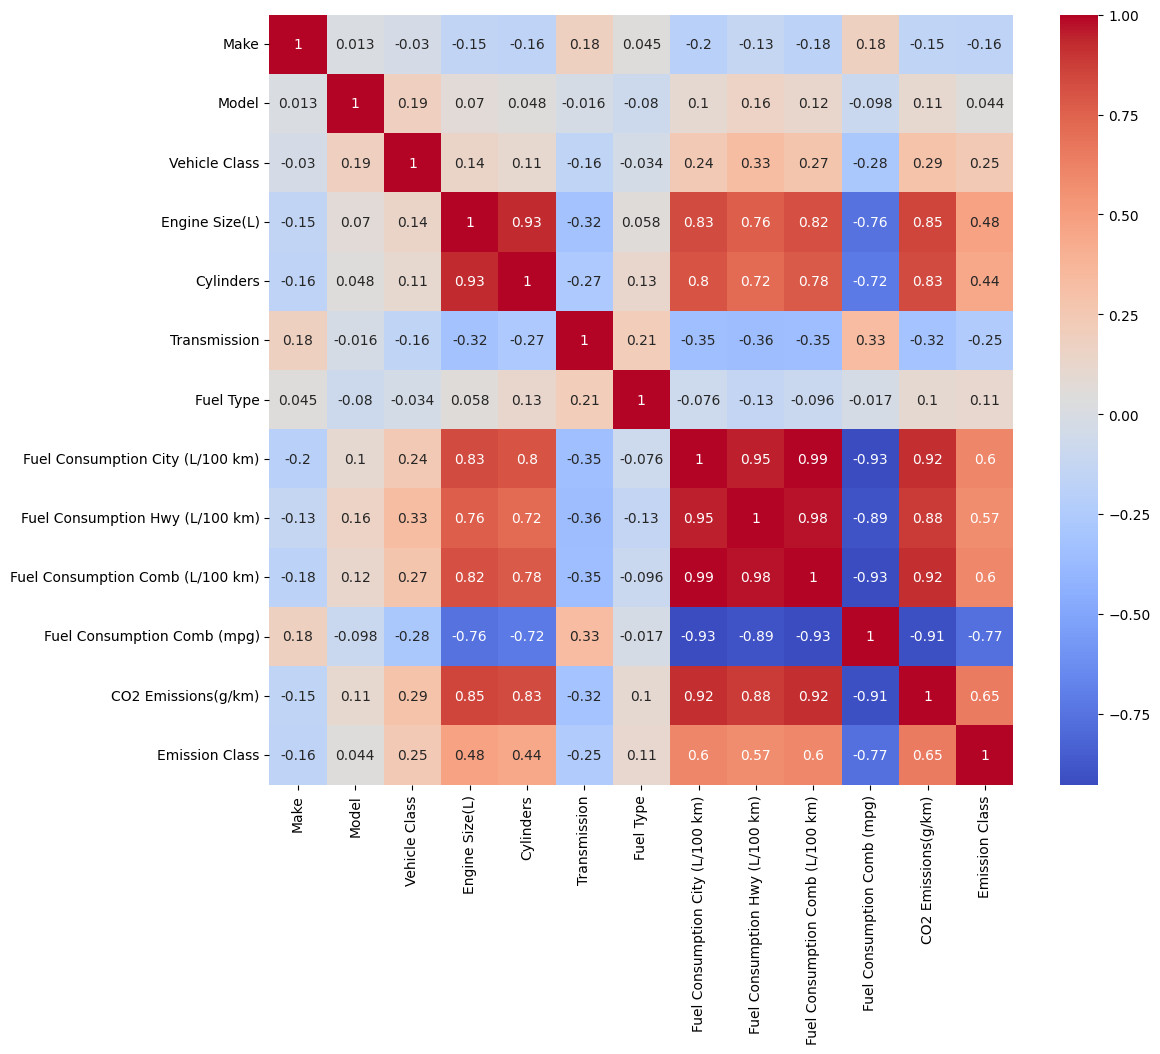

In [13]:


df_train_combined = pd.concat([df_features, df_targets], axis=1)
corr_matrix = df_train_combined.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True , cmap='coolwarm')

# Fuel Consumption Comb (L/100 km) and Cylinders

>#### iii) the data is shuffled and split into training and testing set


In [14]:

# make the 80% from the data training set and 20% from the data testing set
# random state to ensure that the split return the same data each run
df_features, df_targets = shuffle(df_features, df_targets, random_state=42)
df_features_train, df_features_test, df_targets_train, df_targets_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=42) 

print(len(df_features_train))
print(len(df_features_test))
print(len(df_targets_train))
print(len(df_targets_test))

5908
1477
5908
1477


>#### iv) numeric features are scaled


In [15]:


scaler = RobustScaler()

# the scaler return ndarray

df_features_train = scaler.fit_transform(df_features_train)
df_features_test = scaler.fit_transform(df_features_test)


# convert the ndarray to DataFrame

df_features_train = pd.DataFrame(df_features_train, columns=df_features.columns)
df_features_test = pd.DataFrame(df_features_test, columns=df_features.columns)



display(df_features_train.describe().T)
display(df_features_test.describe().T)




,count,mean,std,min,25%,50%,75%,max
Make,5908.0,0.078326,0.566037,-0.900000,-0.450000,0.0,0.550000,1.150000
Model,5908.0,0.032739,0.580979,-0.993448,-0.463206,0.0,0.536794,1.075101
Vehicle Class,5908.0,0.043387,0.535060,-0.666667,-0.444444,0.0,0.555556,1.000000
Engine Size(L),5908.0,0.089380,0.794474,-1.235294,-0.588235,0.0,0.411765,3.176471
Cylinders,5908.0,-0.198883,0.913085,-1.500000,-1.000000,0.0,0.000000,5.000000
Transmission,5908.0,-0.081387,0.606135,-1.250000,-0.750000,0.0,0.250000,0.916667
Fuel Type,5908.0,0.258802,0.882777,-3.000000,0.000000,0.0,1.000000,1.000000
Fuel Consumption City (L/100 km),5908.0,0.101788,0.792289,-1.795455,-0.454545,0.0,0.545455,4.204545
Fuel Consumption Hwy (L/100 km),5908.0,0.124383,0.821371,-1.740741,-0.444444,0.0,0.555556,4.407407
Fuel Consumption Comb (L/100 km),5908.0,0.126494,0.778991,-1.729730,-0.432432,0.0,0.567568,4.216216


,count,mean,std,min,25%,50%,75%,max
Make,1477.0,0.079248,0.563947,-0.900000,-0.450000,0.0,0.550000,1.150000
Model,1477.0,-0.026299,0.572547,-1.057312,-0.524704,0.0,0.475296,0.965415
Vehicle Class,1477.0,0.028963,0.539195,-0.666667,-0.444444,0.0,0.555556,1.000000
Engine Size(L),1477.0,0.106974,0.760176,-1.111111,-0.555556,0.0,0.444444,3.000000
Cylinders,1477.0,-0.166892,0.918277,-1.500000,-1.000000,0.0,0.000000,3.000000
Transmission,1477.0,-0.106071,0.801139,-1.666667,-0.777778,0.0,0.222222,1.222222
Fuel Type,1477.0,0.275559,0.881474,-3.000000,0.000000,0.0,1.000000,1.000000
Fuel Consumption City (L/100 km),1477.0,0.085043,0.773369,-1.739130,-0.456522,0.0,0.543478,4.000000
Fuel Consumption Hwy (L/100 km),1477.0,0.130428,0.804242,-1.678571,-0.428571,0.0,0.571429,4.250000
Fuel Consumption Comb (L/100 km),1477.0,0.106118,0.772085,-1.710526,-0.447368,0.0,0.552632,4.078947


In [16]:
selected_features = ['Fuel Consumption Comb (L/100 km)' , 'Cylinders']

df_selected_features_train = df_features_train[selected_features]
df_selected_features_test = df_features_test[selected_features]


display(df_selected_features_train.head())
display(df_selected_features_test.head())

,Fuel Consumption Comb (L/100 km),Cylinders
0,-0.675676,-1.0
1,0.567568,0.0
2,-0.243243,0.0
3,-0.432432,-1.0
4,-0.216216,-1.0


,Fuel Consumption Comb (L/100 km),Cylinders
0,-0.210526,0.0
1,1.736842,0.0
2,0.500000,-1.0
3,0.263158,0.0
4,-0.684211,-1.0


>#### **d) Implement linear regression using gradient descent from scratch**

>#### ***Hypothesis Function***

In [17]:
def hypothesis(x, theta):
    y_predections = np.dot(x, theta)
    return y_predections

>#### ***Cost Function***

In [18]:
def cost_fun(x, y, theta):
    m = len(y)
    err = 0
    for j in range(m):
        err += ((hypothesis(x[j], theta) - y[j]) ** 2)
    
    cost = (1 / (2 * m)) * err
    return cost


>#### ***Gradient Descent Implementation***

In [19]:
def gradient_descent(x, y ,theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        temp_theta = np.copy(theta)
        for j in range(len(theta)):
            err = 0
            for e in range(len(x)):
                err += x[e,j] * (hypothesis(x[e], theta) - y[e])
            
            gradient = ((alpha/m) * err)
            temp_theta[j] = theta[j] - gradient    
        
        theta = temp_theta
        costs.append(cost_fun(x, y, theta))
    
    return theta, costs

>#### ***Gradient Descent Run***

In [20]:
n = 2 # number of features
theta = np.zeros(n+1) # added 1 for theta0
alpha = 0.03
iterations = 500 
x = df_selected_features_train.to_numpy()
x = np.c_[np.ones((x.shape[0], 1)), x] # added col of ones for theta0, because x0 = 1
y = pd.DataFrame(df_targets_train, columns=df_targets.columns).drop(columns=['Emission Class']).to_numpy().reshape(-1, 1) # reshape to ensure it's a 2d array

theta, costs = gradient_descent(x, y, theta, alpha, iterations)
print("our theta", theta)
for i in range(0, 500, 50): 
    print(costs[i])


our theta [246.71187243  54.49852399  16.54698789]
[31061.42363749]
[1568.62717662]
[303.59397517]
[237.13039661]
[226.00817774]
[220.16677444]
[216.44546999]
[214.04058407]
[212.48495444]
[211.47861369]


>#### ***R<sup>2</sup> Score***

In [21]:
x_test = df_selected_features_test.to_numpy()
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
y_test = pd.DataFrame(df_targets_test, columns=df_targets.columns).drop(columns=['Emission Class']).to_numpy().reshape(-1, 1)
y_predictions = np.array([hypothesis(row, theta) for row in x_test]).reshape(-1, 1) # run the hypothesis function on each row of x to get the array

r2 = r2_score(y_test, y_predictions)  # R2 Score
print("R^2 Score:", r2)

R^2 Score: 0.8764483442111172


>#### ***Gradient Descent Cost Function Plot***

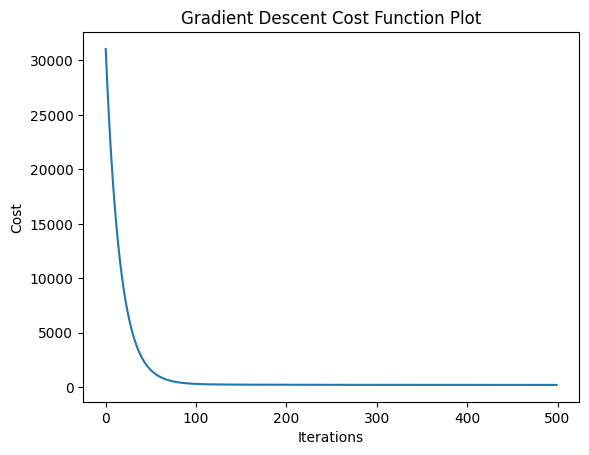

In [22]:
plt.plot(range(iterations), costs)
plt.title("Gradient Descent Cost Function Plot")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

>#### **e) Fit a logistic regression model to the data**

>#### ***Prepare the Data***


In [52]:
x_train = df_selected_features_train
x_test = df_selected_features_test

y_train = df_targets_train.drop(columns=["CO2 Emissions(g/km)"])
y_test = df_targets_test.drop(columns=["CO2 Emissions(g/km)"])

y_train = y_train.astype(int)
y_test = y_test.astype(int)

>#### ***Initialize and Train the Model***

In [53]:
model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

model.fit(x_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

>#### ***Make Predictions and Evaluate the Model***

In [54]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.43%
